In [1]:
import pandas as pd #for importing dataset
import numpy as nm #for doing mathematical operations
from sklearn.model_selection import train_test_split as ttp #to break dataset␣
from sklearn.metrics import classification_report # to generate classification␣
import re #for data cleaning purpose
import string #to deal with text data
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
true=pd.read_csv("/content/true_news.csv")
fake=pd.read_csv("/content/fake_news.csv")

In [5]:
true.head(5)

,class,text,Unnamed: 2
0,1,as,NaN
1,1,hgvj,NaN
2,1,gfh,NaN
3,1,bmn,NaN
4,1,trdet,NaN


In [6]:
fake.head(5)

,class,text
0,0,jfy
1,0,hgj
2,0,bvj
3,0,vjd
4,0,cded


In [7]:
true.shape, fake.shape

((25, 3), (25, 2))

In [8]:
true["class"]=1
fake["text"]=0

In [9]:
data_true_manual_testing = true.tail(10)
for i in range(9,14,-1):
  true.drop([i],axis=0, inplace=True)
data_fake_manual_testing = fake.tail(10)
for i in range(9,14,-1):
  fake.drop([i],axis=0, inplace=True)

In [10]:
data_manual_testing = pd.concat([data_true_manual_testing,data_fake_manual_testing], axis=1)
data_manual_testing.to_csv("manual_testing1.csv ")
print(data_manual_testing)

    class  text Unnamed: 2  class  text
15      1    yt        NaN      0     0
16      1    nb        NaN      0     0
17      1  hjmh        NaN      0     0
18      1   esw          -      0     0
19      1   bvv        NaN      0     0
20      1    uy        NaN      0     0
21      1   bvv        NaN      0     0
22      1  hjmh        NaN      0     0
23      1   gjf        NaN      0     0
24      1   dwc        NaN      0     0


In [11]:
data_merge = pd.concat([fake,true],axis=0)
data_merge.head(10)

,class,text,Unnamed: 2
0,0,0,NaN
1,0,0,NaN
2,0,0,NaN
3,0,0,NaN
4,0,0,NaN
5,0,0,NaN
6,0,0,NaN
7,0,0,NaN
8,0,0,NaN
9,0,0,NaN


class
0    25
1    25
Name: text, dtype: int64


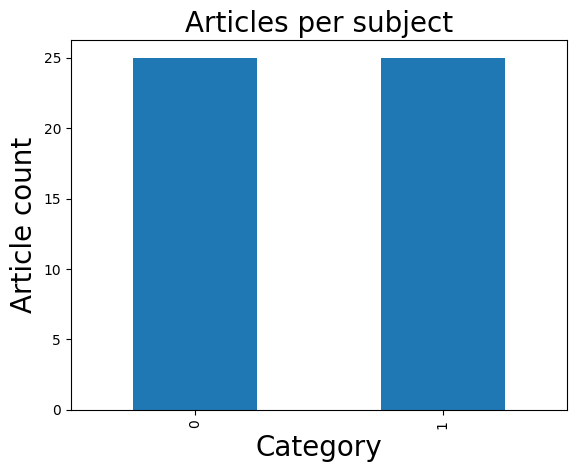

In [12]:
import matplotlib.pyplot as plt
print(data_merge.groupby(['class'])['text'].count())
data_merge.groupby(['class'])['text'].count().plot(kind="bar")
plt.title("Articles per subject",size=20)
plt.xlabel("Category",size=20)
plt.ylabel("Article count",size=20)
plt.show()

class
0    25
1    25
Name: text, dtype: int64
0 = Fake news
1 = True news


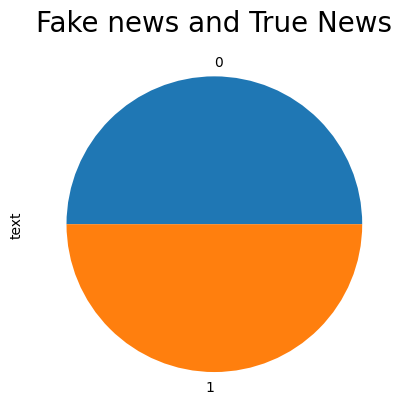

In [13]:
print(data_merge.groupby(['class'])['text'].count())
print("0 = Fake news\n1 = True news")
data_merge.groupby(['class'])['text'].count().plot(kind="pie")
plt.title("Fake news and True News",size=20)
plt.show()

In [14]:
data = data_merge.drop(["class","text"], axis=1)
data.head(10)

,Unnamed: 2
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [15]:
data=data.sample(frac=1)
data.head(10)

,Unnamed: 2
18,-
21,NaN
19,NaN
2,NaN
0,NaN
20,NaN
23,NaN
15,NaN
13,NaN
18,NaN


In [16]:
data.isnull().sum()

Unnamed: 2    49
dtype: int64

In [17]:
def filtering(data):
   text=data.lower()
   text=re.sub('\[.*?\]','',text)
   text=re.sub("\\W"," ",text)
   text=re.sub('https?://\s+|www\.S+','',text)
   text=re.sub('<.*?>+','',text)
   text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
   text=re.sub('\w*\d\w*','',text)
   return text

In [18]:
import pandas as pd
data.info()
data.columns
print(filtering)
"Column" in data.columns
data.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 18 to 7
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 2  1 non-null      object
dtypes: object(1)
memory usage: 800.0+ bytes
<function filtering at 0x794ef1015bd0>


,Unnamed: 2
18,-
21,NaN
19,NaN
2,NaN
0,NaN
20,NaN
23,NaN
15,NaN
13,NaN
18,NaN


In [19]:
data=pd.read_csv("/content/manual_testing1.csv ")
print(data)
x=data[['class']]
y=data['text']

   Unnamed: 0  class  text Unnamed: 2  class.1  text.1
0          15      1    yt        NaN        0       0
1          16      1    nb        NaN        0       0
2          17      1  hjmh        NaN        0       0
3          18      1   esw          -        0       0
4          19      1   bvv        NaN        0       0
5          20      1    uy        NaN        0       0
6          21      1   bvv        NaN        0       0
7          22      1  hjmh        NaN        0       0
8          23      1   gjf        NaN        0       0
9          24      1   dwc        NaN        0       0


In [20]:
from sklearn.model_selection import train_test_split as ttp
x_train, x_test, y_train, y_test = ttp(x, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
vector = TfidfVectorizer() # creating object
#Learn vocabulary and IDF(inverse document frequency), return document-term␣
#IDF returns numerical statics that how the word is important to the document
xv_train=vector.fit_transform(x_train)
xv_test=vector.transform(x_test)

In [28]:
#Logistic Regression:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR. fit(xv_train,y_train) #training or fitting the model to the training set
accuracy = LR.score(xv_test,y_test).round(2) # method computes the accuracy␣
print("Accuracy is" , accuracy)
pred_LR= LR.predict(xv_test) # Predict using the linear model
print(classification_report(y_test,pred_LR)) #

ValueError: Found input variables with inconsistent numbers of samples: [1, 8]

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def output_lable(n):
  if n == 0:
    return "FAKE News"
  elif n == 1:
     return "TRUE News"
def manual_testing(news):
  testing_news = {"text":[news]}
  new_def_test = pd.DataFrame(testing_news)
  new_def_test["text"] = new_def_test["text"].apply(filtering)
  new_x_test = new_def_test["text"]
  new_xv_test = vector.transform(new_x_test)
  pred_LR = LR.predict(new_xv_test)
  pred_DT = DT.predict(new_xv_test)
  pred_RFC = RFC.predict(new_xv_test)
cm = confusion_matrix(y_test ,pred_LR)
print(cm)
sns.heatmap(cm,cmap="BuPu",annot=True)

NameError: name 'pred_LR' is not defined